In [1]:
import pandas as pd
import os
from pandas.tseries.offsets import DateOffset
from openbb_terminal.sdk import openbb
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from dotenv import load_dotenv

load_dotenv()
API_FINNHUB_KEY = os.getenv("API_FINNHUB_KEY")

%matplotlib inline

In [2]:
spy_daily = openbb.stocks.load(
        symbol = 'SPY',
        start_date = '2013-03-01',
        end_date= '2023-03-01',
        monthly = False
)
spy_daily.head()

Loading Daily data for SPY with starting period 2013-03-01.

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
date,,,,,,,,
2013-03-01,125.008632,126.042855,124.446021,125.852562,125.852562,170634800,0.0,0.0
2013-03-04,125.563019,126.522781,125.364456,126.522781,126.522781,99010200,0.0,0.0
2013-03-05,127.135010,127.995478,127.118459,127.656250,127.656250,121431900,0.0,0.0
2013-03-06,128.111254,128.177446,127.548643,127.829948,127.829948,94469900,0.0,0.0
2013-03-07,127.995484,128.227149,127.846562,128.061676,128.061676,86101400,0.0,0.0


In [3]:
tsla_daily = openbb.stocks.load(
        symbol = 'TSLA',
        start_date = '2013-03-01',
        end_date= '2023-03-01',
        monthly = False
)
tsla_daily.head()

Loading Daily data for TSLA with starting period 2013-03-01.

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
date,,,,,,,,
2013-03-01,2.333333,2.338667,2.283333,2.310000,2.310000,23199000,0.0,0.0
2013-03-04,2.318000,2.388667,2.313333,2.372000,2.372000,26365500,0.0,0.0
2013-03-05,2.400000,2.461333,2.386000,2.443333,2.443333,31305000,0.0,0.0
2013-03-06,2.467333,2.525333,2.464667,2.512667,2.512667,17250000,0.0,0.0
2013-03-07,2.515333,2.576667,2.458667,2.548667,2.548667,17374500,0.0,0.0


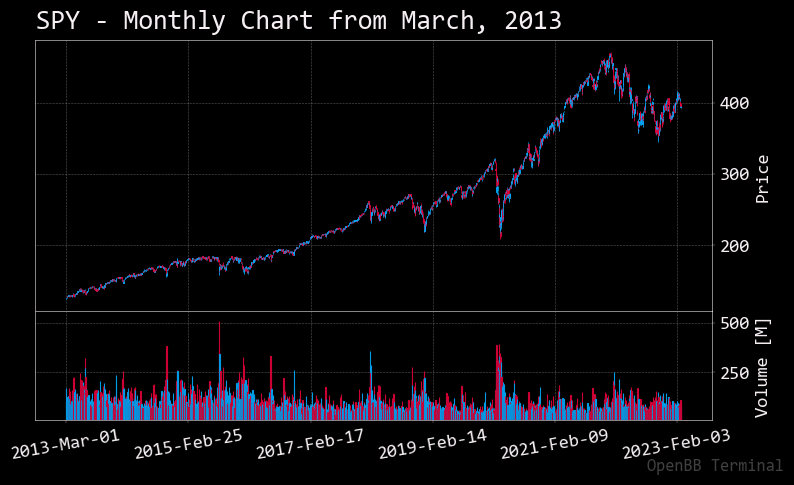

In [4]:
openbb.stocks.candle(
    data = spy_daily,
    asset_type = 'SPY - Monthly Chart from March, 2013',
    symbol = ''
)

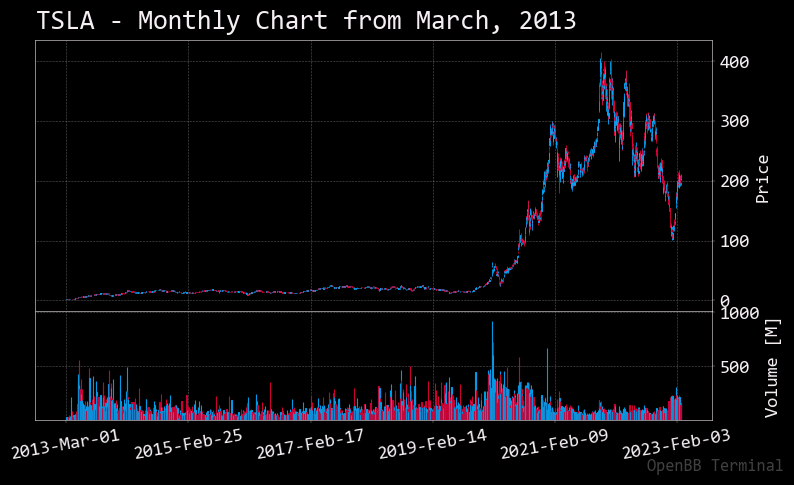

In [5]:
openbb.stocks.candle(
    data = tsla_daily,
    asset_type = 'TSLA - Monthly Chart from March, 2013',
    symbol = ''
)

In [6]:
openbb.stocks.ca.sentiment(["TSLA"])

,TSLA
2023-03-31,0.096
2023-04-03,-0.108
2023-04-04,0.083
2023-04-05,0.179
2023-04-06,-0.242
2023-04-07,0.007
2023-04-10,0.097
2023-04-11,0.296
2023-04-12,-0.183
2023-04-13,0.191


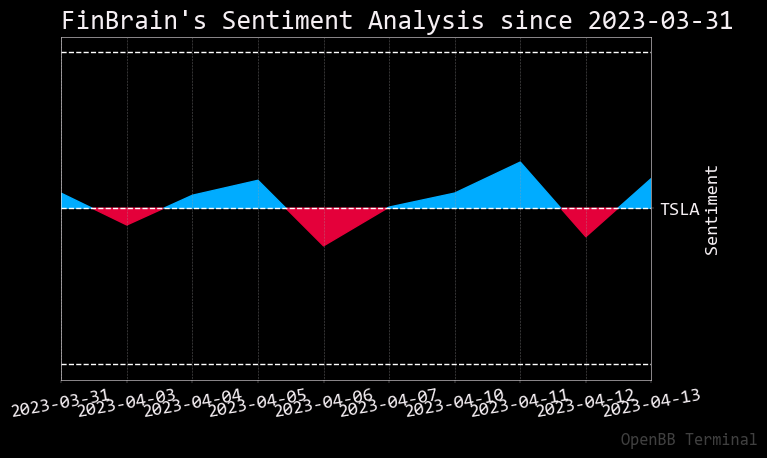

In [7]:
openbb.stocks.ca.sentiment_chart(["TSLA"])

In [8]:
openbb.stocks.ca.scorr(["TSLA"])

(      TSLA
 TSLA   1.0,
              TSLA
 2023-03-31  0.096
 2023-04-03 -0.108
 2023-04-04  0.083
 2023-04-05  0.179
 2023-04-06 -0.242
 2023-04-07  0.007
 2023-04-10  0.097
 2023-04-11  0.296
 2023-04-12 -0.183
 2023-04-13  0.191)

In [9]:
openbb.keys.finnhub(key=API_FINNHUB_KEY)

'defined, test passed'

In [10]:
openbb.stocks.fa.rot("TSLA")

,buy,hold,period,sell,strongBuy,strongSell,symbol
0,16,17,2023-04-01,2,11,2,TSLA
1,19,13,2023-03-01,3,12,2,TSLA
2,18,12,2023-02-01,3,13,2,TSLA
3,17,14,2023-01-01,3,12,1,TSLA


In [11]:
tsla_daily = openbb.forecast.ema(tsla_daily, target_column="Close", period=30)
tsla_daily.head()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,EMA_30
date,,,,,,,,,
2013-03-01,2.333333,2.338667,2.283333,2.310000,2.310000,23199000,0.0,0.0,2.310000
2013-03-04,2.318000,2.388667,2.313333,2.372000,2.372000,26365500,0.0,0.0,2.314000
2013-03-05,2.400000,2.461333,2.386000,2.443333,2.443333,31305000,0.0,0.0,2.322344
2013-03-06,2.467333,2.525333,2.464667,2.512667,2.512667,17250000,0.0,0.0,2.334623
2013-03-07,2.515333,2.576667,2.458667,2.548667,2.548667,17374500,0.0,0.0,2.348432


In [12]:
tsla_daily = openbb.forecast.ema(tsla_daily, target_column="Close", period=120)
tsla_daily.head()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,EMA_30,EMA_120
date,,,,,,,,,,
2013-03-01,2.333333,2.338667,2.283333,2.310000,2.310000,23199000,0.0,0.0,2.310000,2.310000
2013-03-04,2.318000,2.388667,2.313333,2.372000,2.372000,26365500,0.0,0.0,2.314000,2.311025
2013-03-05,2.400000,2.461333,2.386000,2.443333,2.443333,31305000,0.0,0.0,2.322344,2.313212
2013-03-06,2.467333,2.525333,2.464667,2.512667,2.512667,17250000,0.0,0.0,2.334623,2.316508
2013-03-07,2.515333,2.576667,2.458667,2.548667,2.548667,17374500,0.0,0.0,2.348432,2.320346


In [13]:
tsla_daily_ema = tsla_daily[["Close", "EMA_30", "EMA_120"]]
tsla_daily_ema

,Close,EMA_30,EMA_120
date,,,
2013-03-01,2.310000,2.310000,2.310000
2013-03-04,2.372000,2.314000,2.311025
2013-03-05,2.443333,2.322344,2.313212
2013-03-06,2.512667,2.334623,2.316508
2013-03-07,2.548667,2.348432,2.320346
...,...,...,...
2023-02-22,200.860001,180.286725,194.171266
2023-02-23,202.070007,181.692098,194.301823
2023-02-24,196.880005,182.671963,194.344438


In [14]:
# Initialize the new Signal column
tsla_daily_ema['Signal'] = 0.0

# When ema_30 are greater than or equal to ema_120, generate signal to buy stock long
tsla_daily_ema.loc[(tsla_daily_ema['EMA_30'] >= tsla_daily_ema['EMA_120']), 'Signal'] = 1

# When Actual Returns are less than 0, generate signal to sell stock short
tsla_daily_ema.loc[(tsla_daily_ema['EMA_30'] < tsla_daily_ema['EMA_120']), 'Signal'] = -1

# Review the DataFrame
display(tsla_daily_ema.head())
display(tsla_daily_ema.tail())

,Close,EMA_30,EMA_120,Signal
date,,,,
2013-03-01,2.310000,2.310000,2.310000,1.0
2013-03-04,2.372000,2.314000,2.311025,1.0
2013-03-05,2.443333,2.322344,2.313212,1.0
2013-03-06,2.512667,2.334623,2.316508,1.0
2013-03-07,2.548667,2.348432,2.320346,1.0


,Close,EMA_30,EMA_120,Signal
date,,,,
2023-02-22,200.860001,180.286725,194.171266,-1.0
2023-02-23,202.070007,181.692098,194.301823,-1.0
2023-02-24,196.880005,182.671963,194.344438,-1.0
2023-02-27,207.630005,184.282159,194.564034,-1.0
2023-02-28,205.710007,185.664601,194.748265,-1.0


In [15]:
tsla_daily_ema['Signal'].value_counts()

 1.0    1634
-1.0     883
Name: Signal, dtype: int64

In [16]:
tsla_daily_ema["Actual Returns"] = tsla_daily_ema["Close"].pct_change()
tsla_daily_ema = tsla_daily_ema.dropna()
tsla_daily_ema.head()

,Close,EMA_30,EMA_120,Signal,Actual Returns
date,,,,,
2013-03-04,2.372000,2.314000,2.311025,1.0,0.026840
2013-03-05,2.443333,2.322344,2.313212,1.0,0.030073
2013-03-06,2.512667,2.334623,2.316508,1.0,0.028377
2013-03-07,2.548667,2.348432,2.320346,1.0,0.014327
2013-03-08,2.564667,2.362383,2.324384,1.0,0.006278


In [17]:
# Calculate the strategy returns and add them to the signals_df DataFrame
tsla_daily_ema['Strategy Returns'] = tsla_daily_ema['Actual Returns'] * tsla_daily_ema['Signal'].shift()

# Review the DataFrame
display(tsla_daily_ema.head())
display(tsla_daily_ema.tail())

,Close,EMA_30,EMA_120,Signal,Actual Returns,Strategy Returns
date,,,,,,
2013-03-04,2.372000,2.314000,2.311025,1.0,0.026840,NaN
2013-03-05,2.443333,2.322344,2.313212,1.0,0.030073,0.030073
2013-03-06,2.512667,2.334623,2.316508,1.0,0.028377,0.028377
2013-03-07,2.548667,2.348432,2.320346,1.0,0.014327,0.014327
2013-03-08,2.564667,2.362383,2.324384,1.0,0.006278,0.006278


,Close,EMA_30,EMA_120,Signal,Actual Returns,Strategy Returns
date,,,,,,
2023-02-22,200.860001,180.286725,194.171266,-1.0,0.017683,-0.017683
2023-02-23,202.070007,181.692098,194.301823,-1.0,0.006024,-0.006024
2023-02-24,196.880005,182.671963,194.344438,-1.0,-0.025684,0.025684
2023-02-27,207.630005,184.282159,194.564034,-1.0,0.054602,-0.054602
2023-02-28,205.710007,185.664601,194.748265,-1.0,-0.009247,0.009247


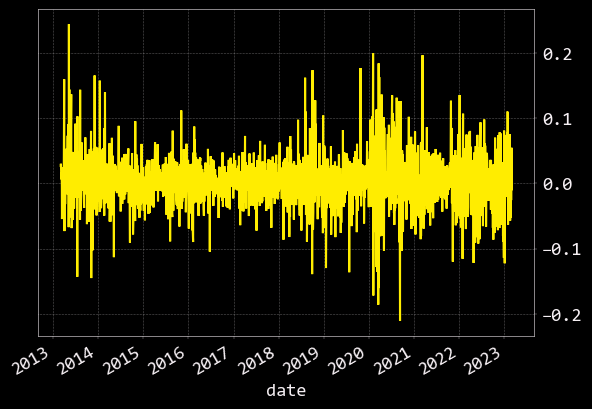

In [18]:
actual_ret = tsla_daily_ema["Actual Returns"].plot()

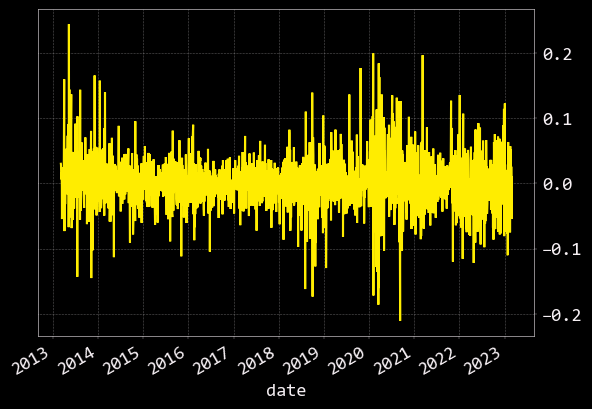

In [19]:
strat_ret = tsla_daily_ema["Strategy Returns"].plot()

<Axes: xlabel='date'>

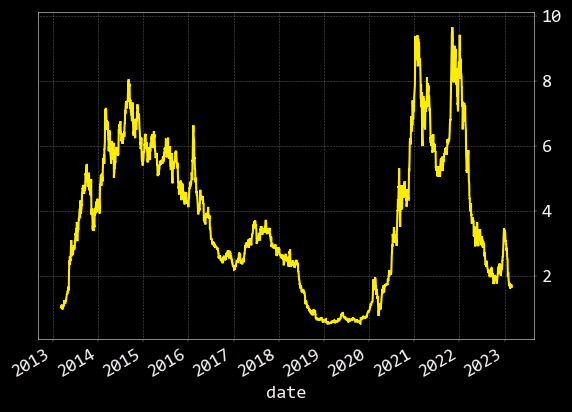

In [20]:
# Plot Strategy Returns to examine performance
(1 + tsla_daily_ema['Strategy Returns']).cumprod().plot()

<Axes: xlabel='date'>

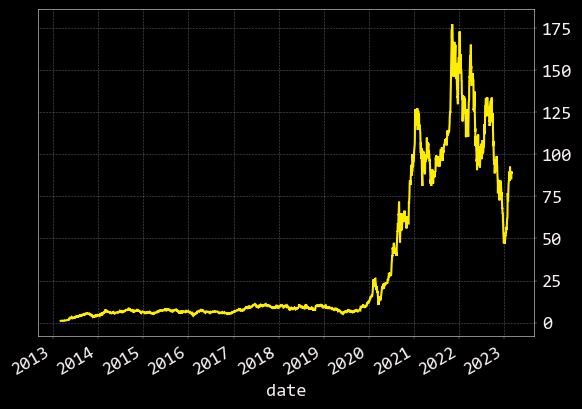

In [21]:
(1 + tsla_daily_ema['Actual Returns']).cumprod().plot()

In [22]:
# Assign a copy of the sma_fast and sma_slow columns to a features DataFrame called X
X = tsla_daily_ema[['EMA_30', 'EMA_120']].shift().dropna()

# Review the DataFrame
X.head()

,EMA_30,EMA_120
date,,
2013-03-05,2.314000,2.311025
2013-03-06,2.322344,2.313212
2013-03-07,2.334623,2.316508
2013-03-08,2.348432,2.320346
2013-03-11,2.362383,2.324384


In [23]:
# Create the target set selecting the Signal column and assiging it to y
y = tsla_daily_ema['Signal']

# Review the value counts
y.value_counts()

 1.0    1633
-1.0     883
Name: Signal, dtype: int64

In [24]:
# Select the start of the training period
training_begin = X.index.min()

# Display the training begin date
print(training_begin)

2013-03-05 00:00:00


In [38]:
# Select the ending period for the training data with an offset of 36 months
training_end = X.index.min() + DateOffset(months=36)

# Display the training end date
print(training_end)

2016-03-05 00:00:00


In [39]:
# Generate the X_train and y_train DataFrames
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

# Review the X_train DataFrame
X_train.head()

,EMA_30,EMA_120
date,,
2013-03-05,2.314000,2.311025
2013-03-06,2.322344,2.313212
2013-03-07,2.334623,2.316508
2013-03-08,2.348432,2.320346
2013-03-11,2.362383,2.324384


In [40]:
# Generate the X_test and y_test DataFrames
X_test = X.loc[training_end+DateOffset(month=12):]
y_test = y.loc[training_end+DateOffset(month=12):]

# Review the X_test DataFrame
X_test.head()

,EMA_30,EMA_120
date,,
2016-12-05,12.759020,13.613494
2016-12-06,12.739298,13.594317
2016-12-07,12.716763,13.574411
2016-12-08,12.727079,13.562878
2016-12-09,12.733031,13.550588


In [41]:
# Scale the features DataFrames
# Create a StandardScaler instance
scaler = StandardScaler()

# Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)

# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [42]:
# From SVM, instantiate SVC classifier model instance
svm_model = SVC()
 
# # Fit the model to the data using the training data
svm_model = svm_model.fit(X_train_scaled, y_train)
 
# # Use the testing data to make the model predictions
svm_pred = svm_model.predict(X_test_scaled)

# # Review the model's predicted values
svm_pred

array([-1., -1., -1., ...,  1.,  1.,  1.])

In [43]:
# Use a classification report to evaluate the model using the predictions and testing data
svm_testing_report = classification_report(y_test, svm_pred)

# Print the classification report
print(svm_testing_report)

              precision    recall  f1-score   support

        -1.0       0.99      0.21      0.35       580
         1.0       0.68      1.00      0.81       988

    accuracy                           0.71      1568
   macro avg       0.84      0.61      0.58      1568
weighted avg       0.80      0.71      0.64      1568



In [45]:
# Create a predictions DataFrame
predictions_df = pd.DataFrame(index=X_test.index)

# Add the SVM model predictions to the DataFrame
predictions_df['Predicted'] = svm_pred

# Add the actual returns to the DataFrame
predictions_df['Actual Returns'] = tsla_daily_ema['Actual Returns']

# Add the strategy returns to the DataFrame
predictions_df['Strategy Returns'] = predictions_df["Actual Returns"] * svm_pred

# Review the DataFrame
display(predictions_df.head())
display(predictions_df.tail())

,Predicted,Actual Returns,Strategy Returns
date,,,
2016-12-05,-1.0,0.029371,-0.029371
2016-12-06,-1.0,-0.005086,0.005086
2016-12-07,-1.0,0.039279,-0.039279
2016-12-08,-1.0,-0.004453,0.004453
2016-12-09,-1.0,-0.000572,0.000572


,Predicted,Actual Returns,Strategy Returns
date,,,
2023-02-22,1.0,0.017683,0.017683
2023-02-23,1.0,0.006024,0.006024
2023-02-24,1.0,-0.025684,-0.025684
2023-02-27,1.0,0.054602,0.054602
2023-02-28,1.0,-0.009247,-0.009247


<Axes: xlabel='date'>

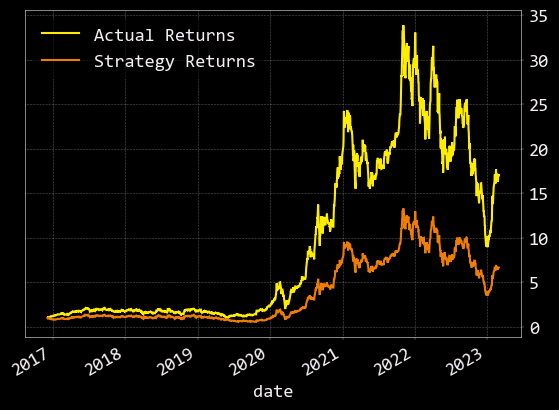

In [46]:
# Plot the actual returns versus the strategy returns
(1 + predictions_df[["Actual Returns", "Strategy Returns"]]).cumprod().plot()

In [47]:
# Import a new classifier from SKLearn
from sklearn.linear_model import LogisticRegression

# Initiate the model instance
logistic_reg_model = LogisticRegression()

In [48]:
# Fit the model using the training data
model = logistic_reg_model.fit(X_train_scaled, y_train)

# Use the testing dataset to generate the predictions for the new model
log_pred = logistic_reg_model.predict(X_test_scaled)

# Review the model's predicted values
log_pred

array([-1., -1., -1., ..., -1., -1., -1.])

In [49]:
# Use a classification report to evaluate the model using the predictions and testing data
logistic_reg_report = classification_report(y_test, log_pred)

# Print the classification report
print(logistic_reg_report)

              precision    recall  f1-score   support

        -1.0       0.61      0.99      0.76       580
         1.0       0.99      0.63      0.77       988

    accuracy                           0.76      1568
   macro avg       0.80      0.81      0.76      1568
weighted avg       0.85      0.76      0.77      1568



In [51]:
# Create a predictions DataFrame
second_df = pd.DataFrame(index=X_test.index)

# Add the SVM model predictions to the DataFrame
second_df['Predicted'] = log_pred

# Add the actual returns to the DataFrame
second_df["Actual Returns"] = tsla_daily_ema["Actual Returns"]

# Add the strategy returns to the DataFrame
second_df['Strategy Returns'] = second_df["Actual Returns"] * log_pred

# Review the DataFrame
second_df

,Predicted,Actual Returns,Strategy Returns
date,,,
2016-12-05,-1.0,0.029371,-0.029371
2016-12-06,-1.0,-0.005086,0.005086
2016-12-07,-1.0,0.039279,-0.039279
2016-12-08,-1.0,-0.004453,0.004453
2016-12-09,-1.0,-0.000572,0.000572
...,...,...,...
2023-02-22,-1.0,0.017683,-0.017683
2023-02-23,-1.0,0.006024,-0.006024
2023-02-24,-1.0,-0.025684,0.025684


<Axes: xlabel='date'>

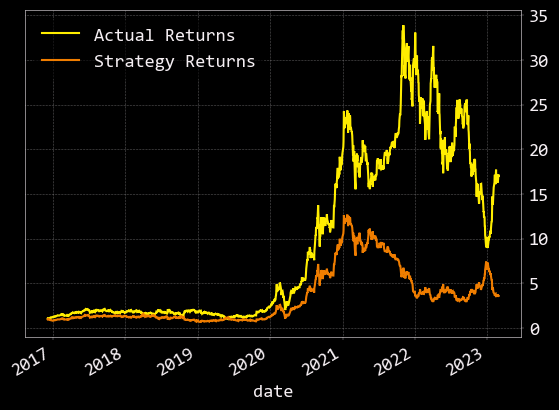

In [52]:
# Plot the actual returns versus the strategy returns
(1 + second_df[["Actual Returns", "Strategy Returns"]]).cumprod().plot()

Warning: when using past covariates n_predict must equal output_chunk_length. We have changed your output_chunk_length to 80 to match your n_predict

Covariate #0: EMA_30

Predicting Regression for 80 days


  0%|          | 0/912 [00:00<?, ?it/s]

Regression model obtains MAPE: 5.48%

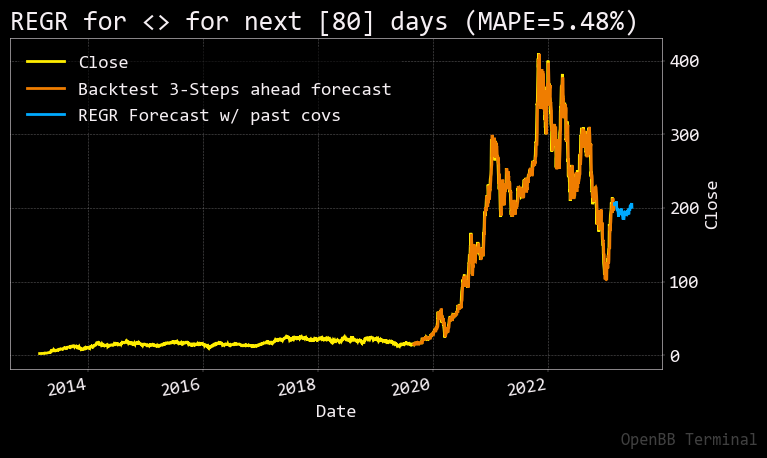

   Actual price: 205.71    
┏━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Datetime   ┃ Prediction ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ 2023-03-01 │ 205.86     │
├────────────┼────────────┤
│ 2023-03-02 │ 204.61     │
├────────────┼────────────┤
│ 2023-03-03 │ 203.12     │
├────────────┼────────────┤
│ 2023-03-06 │ 206.29     │
├────────────┼────────────┤
│ 2023-03-07 │ 205.63     │
├────────────┼────────────┤
│ 2023-03-08 │ 206.44     │
├────────────┼────────────┤
│ 2023-03-09 │ 204.23     │
├────────────┼────────────┤
│ 2023-03-10 │ 205.36     │
├────────────┼────────────┤
│ 2023-03-13 │ 208.01     │
├────────────┼────────────┤
│ 2023-03-14 │ 208.82     │
├────────────┼────────────┤
│ 2023-03-15 │ 201.16     │
├────────────┼────────────┤
│ 2023-03-16 │ 200.65     │
├────────────┼────────────┤
│ 2023-03-17 │ 198.00     │
├────────────┼────────────┤
│ 2023-03-20 │ 196.08     │
├────────────┼────────────┤
│ 2023-03-21 │ 196.63     │
├────────────┼────────────┤
│ 2023-03-22 │ 199.33     │
├────────────┼────────────┤
│ 2023-03-23 │ 198.13     │
├────────────┼────────────┤
│ 2023-03-24 │ 194.44     │
├────────────┼────────────┤
│ 2023-03-27 │ 187.84     │
├────────────┼────────────┤
│ 2023-03-28 │ 191.87     │
├────────────┼────────────┤
│ 2023-03-29 │ 195.84     │
├────────────┼────────────┤
│ 2023-03-30 │ 191.89     │
├────────────┼────────────┤
│ 2023-03-31 │ 190.17     │
├────────────┼────────────┤
│ 2023-04-03 │ 195.15     │
├────────────┼────────────┤
│ 2023-04-04 │ 194.96     │
├────────────┼────────────┤
│ 2023-04-05 │ 191.77     │
├────────────┼────────────┤
│ 2023-04-06 │ 192.30     │
├────────────┼────────────┤
│ 2023-04-07 │ 193.41     │
├────────────┼────────────┤
│ 2023-04-10 │ 193.72     │
├────────────┼────────────┤
│ 2023-04-11 │ 195.26     │
├────────────┼────────────┤
│ 2023-04-12 │ 196.82     │
├────────────┼────────────┤
│ 2023-04-13 │ 199.11     │
├────────────┼────────────┤
│ 2023-04-14 │ 197.28     │
├────────────┼────────────┤
│ 2023-04-17 │ 195.43     │
├────────────┼────────────┤
│ 2023-04-18 │ 195.65     │
├────────────┼────────────┤
│ 2023-04-19 │ 195.10     │
├────────────┼────────────┤
│ 2023-04-20 │ 189.38     │
├────────────┼────────────┤
│ 2023-04-21 │ 190.60     │
├────────────┼────────────┤
│ 2023-04-24 │ 187.39     │
├────────────┼────────────┤
│ 2023-04-25 │ 184.23     │
├────────────┼────────────┤
│ 2023-04-26 │ 189.01     │
├────────────┼────────────┤
│ 2023-04-27 │ 191.55     │
├────────────┼────────────┤
│ 2023-04-28 │ 186.52     │
├────────────┼────────────┤
│ 2023-05-01 │ 186.19     │
├────────────┼────────────┤
│ 2023-05-02 │ 187.97     │
├────────────┼────────────┤
│ 2023-05-03 │ 193.01     │
├────────────┼────────────┤
│ 2023-05-04 │ 193.43     │
├────────────┼────────────┤
│ 2023-05-05 │ 193.05     │
├────────────┼────────────┤
│ 2023-05-08 │ 193.43     │
├────────────┼────────────┤
│ 2023-05-09 │ 192.73     │
├────────────┼────────────┤
│ 2023-05-10 │ 192.97     │
├────────────┼────────────┤
│ 2023-05-11 │ 190.32     │
├────────────┼────────────┤
│ 2023-05-12 │ 191.91     │
├────────────┼────────────┤
│ 2023-05-15 │ 191.40     │
├────────────┼────────────┤
│ 2023-05-16 │ 195.62     │
├────────────┼────────────┤
│ 2023-05-17 │ 192.10     │
├────────────┼────────────┤
│ 2023-05-18 │ 192.73     │
├────────────┼────────────┤
│ 2023-05-19 │ 191.78     │
├────────────┼────────────┤
│ 2023-05-22 │ 190.29     │
├────────────┼────────────┤
│ 2023-05-23 │ 195.25     │
├────────────┼────────────┤
│ 2023-05-24 │ 195.67     │
├────────────┼────────────┤
│ 2023-05-25 │ 195.24     │
├────────────┼────────────┤
│ 2023-05-26 │ 194.73     │
├────────────┼────────────┤
│ 2023-05-29 │ 194.77     │
├────────────┼────────────┤
│ 2023-05-30 │ 195.13     │
├────────────┼────────────┤
│ 2023-05-31 │ 191.22     │
├────────────┼────────────┤
│ 2023-06-01 │ 193.65     │
├────────────┼────────────┤
│ 2023-06-02 │ 197.97     │
├────────────┼────────────┤
│ 2023-06-05 │ 198.24     │
├────────────┼────────────┤
│ 2023-06-06 │ 196.09   

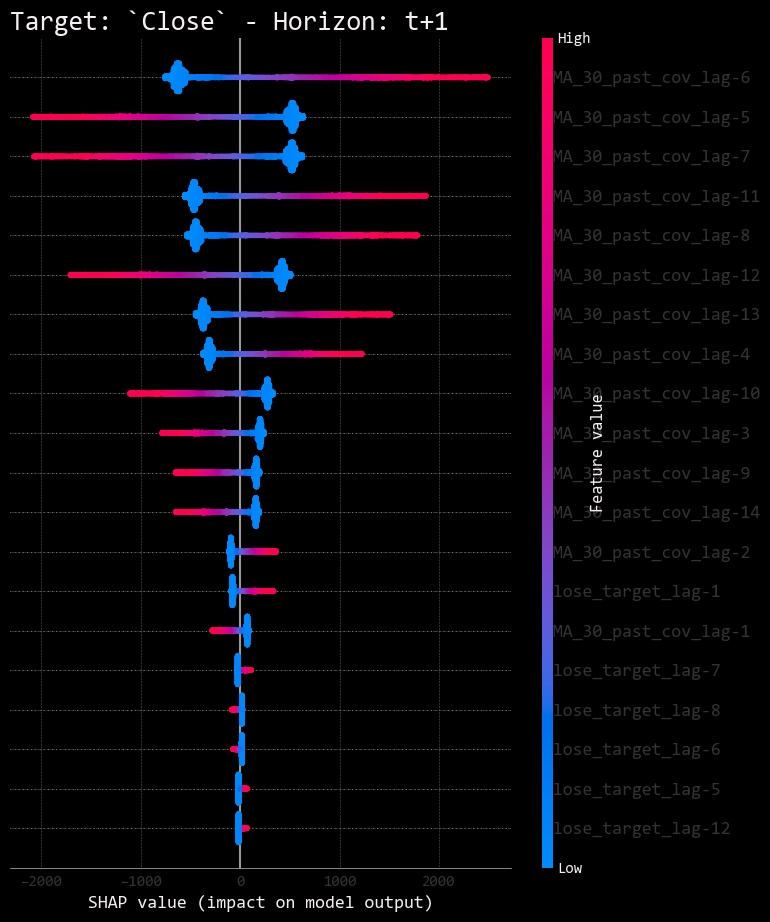

<Figure size 640x480 with 0 Axes>

In [53]:

openbb.forecast.regr_chart(tsla_daily, target_column = 'Close', n_predict= 80, past_covariates="EMA_30", train_split=.65, forecast_horizon= 3)

Warning: when using past covariates n_predict must equal output_chunk_length. We have changed your output_chunk_length to 50 to match your n_predict

Covariate #0: EMA_120

Predicting Regression for 50 days


  0%|          | 0/389 [00:00<?, ?it/s]

Regression model obtains MAPE: 7.16%

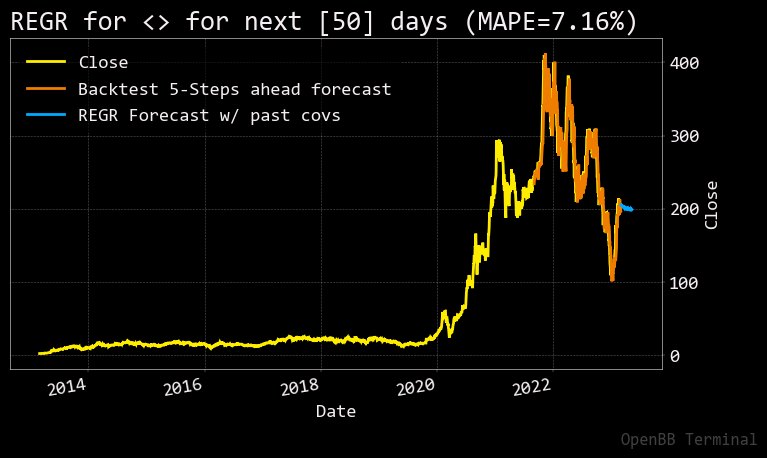

   Actual price: 205.71    
┏━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Datetime   ┃ Prediction ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ 2023-03-01 │ 205.12     │
├────────────┼────────────┤
│ 2023-03-02 │ 203.61     │
├────────────┼────────────┤
│ 2023-03-03 │ 204.93     │
├────────────┼────────────┤
│ 2023-03-06 │ 204.69     │
├────────────┼────────────┤
│ 2023-03-07 │ 204.51     │
├────────────┼────────────┤
│ 2023-03-08 │ 203.59     │
├────────────┼────────────┤
│ 2023-03-09 │ 202.51     │
├────────────┼────────────┤
│ 2023-03-10 │ 203.73     │
├────────────┼────────────┤
│ 2023-03-13 │ 204.30     │
├────────────┼────────────┤
│ 2023-03-14 │ 205.01     │
├────────────┼────────────┤
│ 2023-03-15 │ 203.71     │
├────────────┼────────────┤
│ 2023-03-16 │ 203.04     │
├────────────┼────────────┤
│ 2023-03-17 │ 201.53     │
├────────────┼────────────┤
│ 2023-03-20 │ 201.20     │
├────────────┼────────────┤
│ 2023-03-21 │ 201.62     │
├────────────┼────────────┤
│ 2023-03-22 │ 203.69     │
├────────────┼────────────┤
│ 2023-03-23 │ 203.29     │
├────────────┼────────────┤
│ 2023-03-24 │ 202.72     │
├────────────┼────────────┤
│ 2023-03-27 │ 200.19     │
├────────────┼────────────┤
│ 2023-03-28 │ 200.42     │
├────────────┼────────────┤
│ 2023-03-29 │ 201.89     │
├────────────┼────────────┤
│ 2023-03-30 │ 200.57     │
├────────────┼────────────┤
│ 2023-03-31 │ 200.35     │
├────────────┼────────────┤
│ 2023-04-03 │ 202.38     │
├────────────┼────────────┤
│ 2023-04-04 │ 201.57     │
├────────────┼────────────┤
│ 2023-04-05 │ 200.35     │
├────────────┼────────────┤
│ 2023-04-06 │ 201.03     │
├────────────┼────────────┤
│ 2023-04-07 │ 199.75     │
├────────────┼────────────┤
│ 2023-04-10 │ 199.50     │
├────────────┼────────────┤
│ 2023-04-11 │ 201.58     │
├────────────┼────────────┤
│ 2023-04-12 │ 201.70     │
├────────────┼────────────┤
│ 2023-04-13 │ 200.98     │
├────────────┼────────────┤
│ 2023-04-14 │ 199.80     │
├────────────┼────────────┤
│ 2023-04-17 │ 199.88     │
├────────────┼────────────┤
│ 2023-04-18 │ 198.90     │
├────────────┼────────────┤
│ 2023-04-19 │ 199.39     │
├────────────┼────────────┤
│ 2023-04-20 │ 198.60     │
├────────────┼────────────┤
│ 2023-04-21 │ 201.25     │
├────────────┼────────────┤
│ 2023-04-24 │ 199.97     │
├────────────┼────────────┤
│ 2023-04-25 │ 198.09     │
├────────────┼────────────┤
│ 2023-04-26 │ 198.54     │
├────────────┼────────────┤
│ 2023-04-27 │ 199.31     │
├────────────┼────────────┤
│ 2023-04-28 │ 196.90     │
├────────────┼────────────┤
│ 2023-05-01 │ 197.94     │
├────────────┼────────────┤
│ 2023-05-02 │ 199.17     │
├────────────┼────────────┤
│ 2023-05-03 │ 200.02     │
├────────────┼────────────┤
│ 2023-05-04 │ 199.70     │
├────────────┼────────────┤
│ 2023-05-05 │ 199.81     │
├────────────┼────────────┤
│ 2023-05-08 │ 199.13     │
├────────────┼────────────┤
│ 2023-05-09 │ 198.92     │
└────────────┴────────────┘

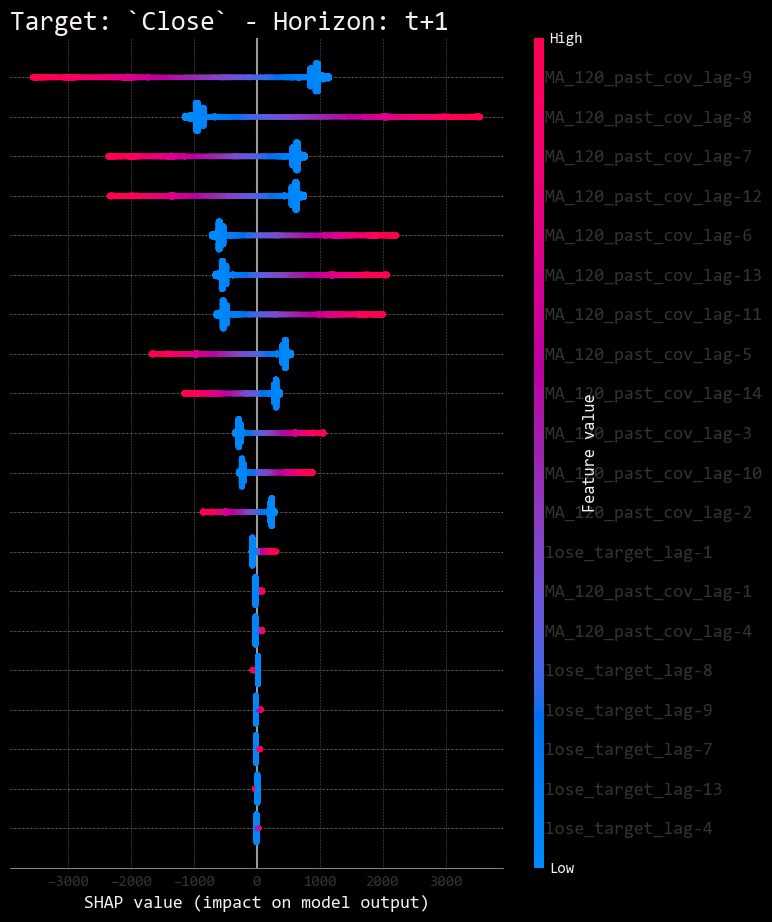

<Figure size 640x480 with 0 Axes>

In [54]:
openbb.forecast.regr_chart(tsla_daily, target_column = 'Close', n_predict= 50, past_covariates="EMA_120")

Covariate #0: EMA_30

Covariate #1: EMA_120

Predicting Regression for 5 days


  0%|          | 0/389 [00:00<?, ?it/s]

Regression model obtains MAPE: 6.98%

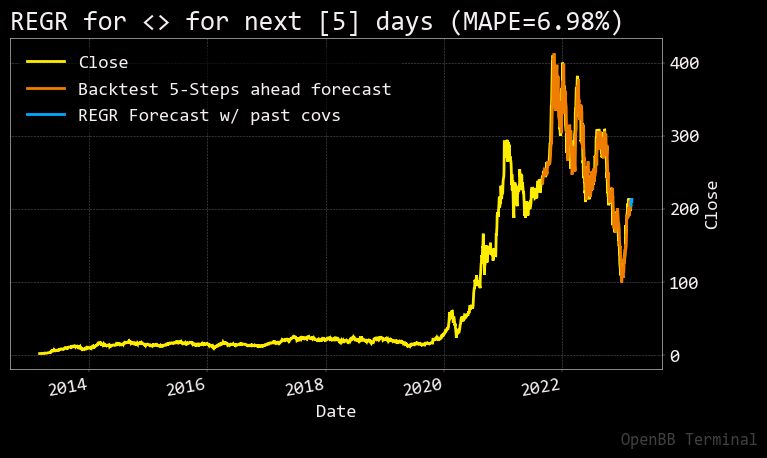

   Actual price: 205.71    
┏━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Datetime   ┃ Prediction ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ 2023-03-01 │ 204.79     │
├────────────┼────────────┤
│ 2023-03-02 │ 214.03     │
├────────────┼────────────┤
│ 2023-03-03 │ 211.59     │
├────────────┼────────────┤
│ 2023-03-06 │ 208.19     │
├────────────┼────────────┤
│ 2023-03-07 │ 212.68     │
└────────────┴────────────┘

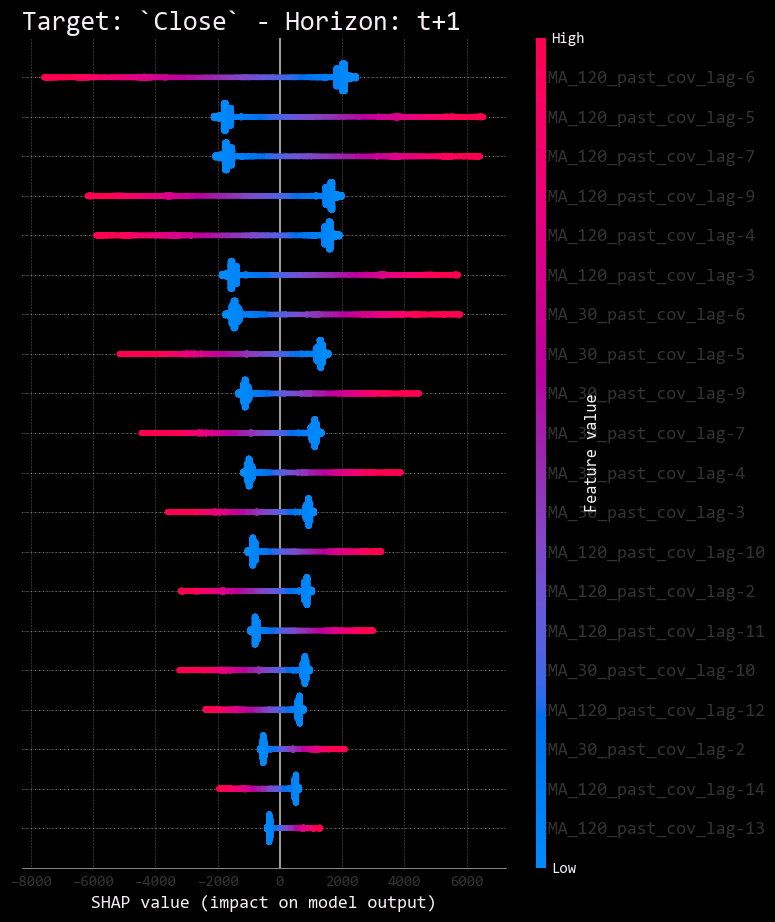

<Figure size 640x480 with 0 Axes>

In [55]:
openbb.forecast.regr_chart(tsla_daily, target_column = 'Close', past_covariates= "EMA_30,EMA_120")

In [56]:
openbb.qa.summary(tsla_daily)

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,EMA_30,EMA_120
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03,2517.0,2517.000000,2517.000000,2517.000000
mean,75.706092,77.427447,73.826268,75.667292,75.667292,1.146960e+08,0.0,0.003178,74.611018,71.118195
std,102.446431,104.827035,99.773643,102.325394,102.325394,8.072957e+07,0.0,0.116204,101.153577,97.683255
min,2.318000,2.338667,2.283333,2.310000,2.310000,6.603000e+06,0.0,0.000000,2.310000,2.310000
10%,12.244933,12.467066,12.016533,12.233067,12.233067,4.786770e+07,0.0,0.000000,12.088545,11.016044
25%,14.728667,14.958000,14.488000,14.685333,14.685333,6.477150e+07,0.0,0.000000,14.766212,14.714179
50%,19.632668,20.000000,19.236668,19.647333,19.647333,9.090450e+07,0.0,0.000000,19.768988,19.871419
75%,118.666664,122.913330,113.836670,119.769997,119.769997,1.353222e+08,0.0,0.000000,113.387572,78.429268
90%,251.020667,254.887994,243.935336,251.069330,251.069330,2.136500e+08,0.0,0.000000,252.229301,260.349137
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08,0.0,5.000000,353.321337,314.959280
